Steps: <br>
Importing Data <br>
Merging different df's on a unique field <br>
Searching for Null values <br>
Finding outliers and Imputation <br>
Studying the dataframe <br>
Converting binary variables <br>
Creating dummy variables <br>
Running machine learning algorithms

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 500)

In [4]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.shape

(7043, 21)

In [10]:
def details(df):     
    # Sum of null values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Data type 
    data_type = df.dtypes
    
    #unique values
    unique_val = df.nunique()
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, data_type, unique_val], axis=1)   
        
    # Rename the columns for clarity
    mis_val_table_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return mis_val_table_columns

In [11]:
details(telecom)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
customerID,0,0.0,object,7043
tenure,0,0.0,int64,73
PhoneService,0,0.0,object,2
Contract,0,0.0,object,3
PaperlessBilling,0,0.0,object,2
PaymentMethod,0,0.0,object,4
MonthlyCharges,0,0.0,float64,1585
TotalCharges,0,0.0,object,6531
Churn,0,0.0,object,2
gender,0,0.0,object,2


In [12]:
telecom.PhoneService.value_counts(dropna=False)

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [13]:
telecom.Contract.value_counts(dropna=False)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [14]:
telecom.PaperlessBilling.value_counts(dropna=False)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [15]:
telecom.PaymentMethod.value_counts(dropna=False)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [16]:
telecom.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
telecom.gender.value_counts(dropna=False)

Male      3555
Female    3488
Name: gender, dtype: int64

In [18]:
telecom.Partner.value_counts(dropna=False)

No     3641
Yes    3402
Name: Partner, dtype: int64

In [19]:
telecom.Dependents.value_counts(dropna=False)

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [20]:
telecom.MultipleLines.value_counts(dropna=False)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [21]:
telecom.InternetService.value_counts(dropna=False)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [22]:
telecom.OnlineSecurity.value_counts(dropna=False)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [23]:
telecom.OnlineBackup.value_counts(dropna=False)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [24]:
telecom.DeviceProtection.value_counts(dropna=False)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [25]:
telecom.TechSupport.value_counts(dropna=False)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [26]:
telecom.StreamingTV.value_counts(dropna=False)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [27]:
telecom.StreamingMovies.value_counts(dropna=False)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [28]:
telecom.SeniorCitizen.value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [29]:
#telecom.TotalCharges = telecom.TotalCharges.astype(float)
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors='coerce')

In [30]:
details(telecom)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
customerID,0,0.000000,object,7043
tenure,0,0.000000,int64,73
PhoneService,0,0.000000,object,2
Contract,0,0.000000,object,3
PaperlessBilling,0,0.000000,object,2
PaymentMethod,0,0.000000,object,4
MonthlyCharges,0,0.000000,float64,1585
TotalCharges,11,0.156183,float64,6530
Churn,0,0.000000,object,2
gender,0,0.000000,object,2


In [31]:
telecom.TotalCharges.fillna(telecom.TotalCharges.median(), inplace=True)
#telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [32]:
telecom[['tenure','MonthlyCharges','TotalCharges']].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.900000
5%,1.000000,19.650000,49.650000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
90%,69.000000,102.600000,5973.690000


In [33]:
details(telecom)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
customerID,0,0.0,object,7043
tenure,0,0.0,int64,73
PhoneService,0,0.0,object,2
Contract,0,0.0,object,3
PaperlessBilling,0,0.0,object,2
PaymentMethod,0,0.0,object,4
MonthlyCharges,0,0.0,float64,1585
TotalCharges,0,0.0,float64,6531
Churn,0,0.0,object,2
gender,0,0.0,object,2


### Converting to Binary

In [34]:
def binary_mapping(x):
    return x.map({'Yes':1, 'No':0})
telecom[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']] = telecom[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']].apply(binary_mapping)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


### Creating dummy variables (one hot encoding)

In [35]:
dummy = pd.get_dummies(telecom[['Contract','PaymentMethod','gender']], drop_first=True)
telecom = pd.concat([telecom, dummy], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0


### Creating dummy variables by removing unwanted segments

In [36]:
is1 = pd.get_dummies(telecom['InternetService'], prefix='InternetService')
# Dropping MultipleLines_No phone service column
is2 = is1.drop(['InternetService_No'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,is2], axis=1)

ml1 = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml2 = ml1.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml2], axis=1)

os1 = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
# Dropping MultipleLines_No phone service column
os2 = os1.drop(['OnlineSecurity_No internet service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os2], axis=1)

dp1 = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
# Dropping MultipleLines_No phone service column
dp2 = dp1.drop(['DeviceProtection_No internet service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp2], axis=1)

ts1 = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts2 = ts1.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts2], axis=1)

st1 =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st2 = st1.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st2], axis=1)

sm1 = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm2 = sm1.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm2], axis=1)

### Dropping repeated columns

In [37]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_DSL,InternetService_Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [38]:
telecom.shape

(7043, 30)

In [39]:
details(telecom)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
customerID,0,0.0,object,7043
tenure,0,0.0,int64,73
PhoneService,0,0.0,int64,2
PaperlessBilling,0,0.0,int64,2
MonthlyCharges,0,0.0,float64,1585
TotalCharges,0,0.0,float64,6531
Churn,0,0.0,int64,2
SeniorCitizen,0,0.0,int64,2
Partner,0,0.0,int64,2
Dependents,0,0.0,int64,2


### Churn Rate

In [40]:
churn_rate = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn_rate

26.536987079369588

### Heatmap

In [41]:
telecom_cols = telecom.copy()
telecom_cols.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_DSL,InternetService_Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

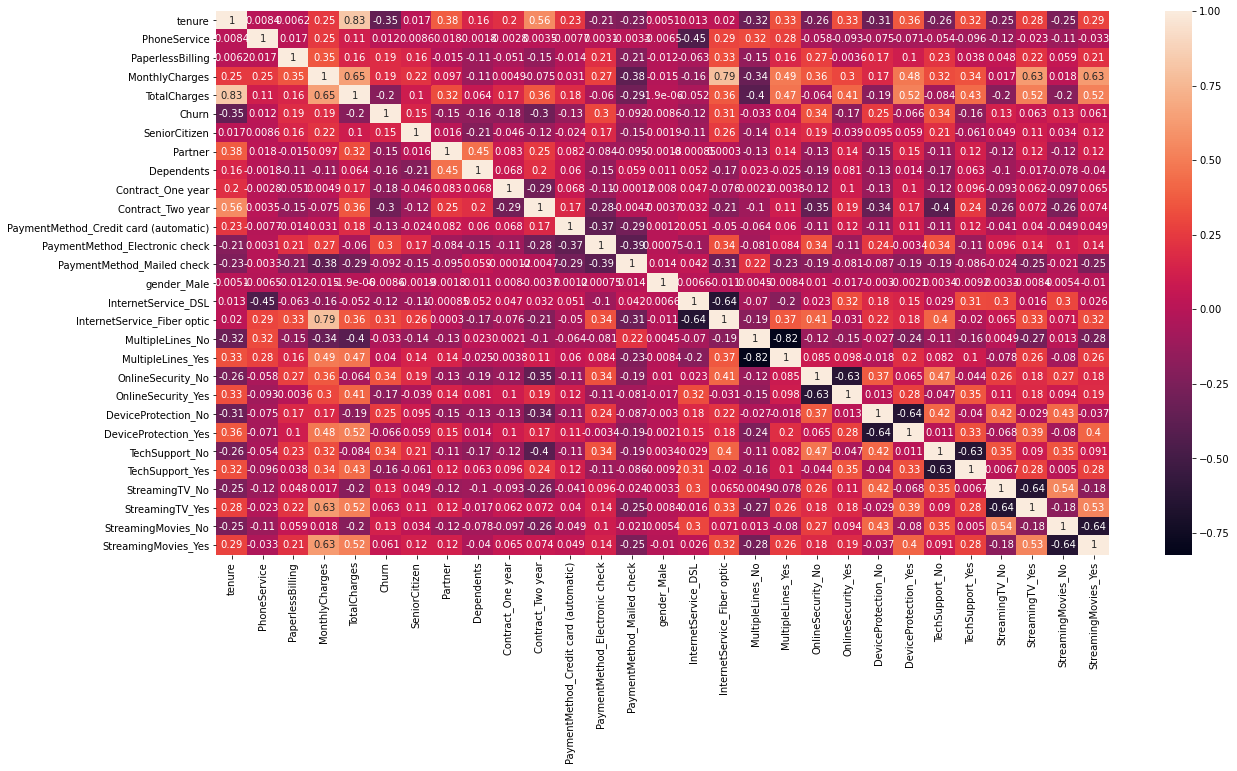

In [43]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom_cols.corr(),annot = True)
plt.show()

### Dropping highly correlated variables

In [44]:
corr_matrix = telecom_cols.corr().abs()
val = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in val.columns if any(val[column] > 0.6)]
to_drop

['TotalCharges',
 'InternetService_Fiber optic',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes']

In [45]:
telecom_cols.drop(to_drop, axis=1, inplace=True)
telecom_cols.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_DSL,MultipleLines_No,OnlineSecurity_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No
0,7590-VHVEG,1,0,1,29.85,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1
1,5575-GNVDE,34,1,0,56.95,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,1
2,3668-QPYBK,2,1,1,53.85,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1
3,7795-CFOCW,45,0,0,42.30,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1
4,9237-HQITU,2,1,1,70.70,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1


## Machine Learning Algorithmns

### Logistic Regression

### Train-test-split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = telecom_cols.drop(['customerID','Churn'], axis=1)
y = telecom_cols['Churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 20), (2113, 20), (4930,), (2113,))

### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_DSL,MultipleLines_No,OnlineSecurity_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No
877,0.754422,0,0,-0.145568,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5792,-0.710751,1,1,1.051796,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
5334,0.673024,1,1,1.437668,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
878,1.120716,1,0,0.006794,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1
6578,-0.914247,1,0,0.298268,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0


### Model Building

In [52]:
import statsmodels.api as sm

In [53]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.1
Date:                Mon, 11 Jan 2021   Deviance:                       4040.2
Time:                        14:52:34   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0915      0.224     -4.864      0.000      -1.531      -0.652
tenure                                   -0.8691      0.069    -12.677      0.000      -1.003      -0.735
PhoneService                             -0.5426      0.176     -3.079      0.002      -0.888      -0.197
PaperlessBilling                          0.3417      0.090      3.804      0.000       0.166       0.518
MonthlyCharges                            0.4917      0.070      6.994      0.000       0.354       0.630
SeniorCitizen                             0.2880      0.103      2.807      0.005       0.087       0.489
Partner                                   0.0335      0.094      0.357      0.721      -0.150       0.217
Dependents                               -0.2336      0.107     -2.174      0.030      -0.444      -0.023
Contract_One year                        -0.6762      0.128     -5.272      0.000      -0.928      -0.425
Contract_Two year                        -1.3090      0.205     -6.387      0.000      -1.711      -0.907
PaymentMethod_Credit card (automatic)    -0.1464      0.138     -1.060      0.289      -0.417       0.124
PaymentMethod_Electronic check            0.2856      0.114      2.505      0.012       0.062       0.509
PaymentMethod_Mailed check               -0.0493      0.137     -0.360      0.719      -0.318       0.219
gender_Male                              -0.0323      0.078     -0.412      0.680      -0.186       0.121
InternetService_DSL                      -0.4747      0.110     -4.334      0.000      -0.689      -0.260
MultipleLines_No                         -0.2699      0.097     -2.784      0.005      -0.460      -0.080
OnlineSecurity_No                         0.3651      0.097      3.746      0.000       0.174       0.556
DeviceProtection_No                       0.1051      0.093      1.133      0.257      -0.077       0.287
TechSupport_No                            0.5787      0.100      5.759      0.000       0.382       0.776
StreamingTV_No                           -0.0850      0.095     -0.895      0.371      -0.271       0.101
StreamingMovies_No                       -0.0662      0.095     -0.700      0.484      -0.252       0.119
=========================================================================================================
"""

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [55]:
col = X_train.columns
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_DSL', 'MultipleLines_No', 'OnlineSecurity_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], dtype='object')

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [VIF(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.92
17,TechSupport_No,3.22
8,Contract_Two year,3.14
15,OnlineSecurity_No,3.06
14,MultipleLines_No,2.94
2,PaperlessBilling,2.79
16,DeviceProtection_No,2.77
5,Partner,2.77
10,PaymentMethod_Electronic check,2.70
0,tenure,2.69


### RFE

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [58]:
logreg = LogisticRegression()

In [59]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [60]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True, False])

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 4),
 ('gender_Male', False, 5),
 ('InternetService_DSL', True, 1),
 ('MultipleLines_No', True, 1),
 ('OnlineSecurity_No', True, 1),
 ('DeviceProtection_No', False, 2),
 ('TechSupport_No', True, 1),
 ('StreamingTV_No', True, 1),
 ('StreamingMovies_No', False, 3)]

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'MultipleLines_No', 'OnlineSecurity_No', 'TechSupport_No', 'StreamingTV_No'], dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['Partner', 'PaymentMethod_Mailed check', 'gender_Male', 'DeviceProtection_No', 'StreamingMovies_No'], dtype='object')

In [64]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Mon, 11 Jan 2021   Deviance:                       4042.2
Time:                        14:52:36   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1018      0.207     -5.323      0.000      -1.508      -0.696
tenure                                   -0.8683      0.066    -13.147      0.000      -0.998      -0.739
PhoneService                             -0.5546      0.175     -3.161      0.002      -0.898      -0.211
PaperlessBilling                          0.3460      0.090      3.862      0.000       0.170       0.522
MonthlyCharges                            0.5085      0.069      7.375      0.000       0.373       0.644
SeniorCitizen                             0.2913      0.102      2.860      0.004       0.092       0.491
Dependents                               -0.2181      0.098     -2.235      0.025      -0.409      -0.027
Contract_One year                        -0.6833      0.128     -5.351      0.000      -0.934      -0.433
Contract_Two year                        -1.3186      0.204     -6.452      0.000      -1.719      -0.918
PaymentMethod_Credit card (automatic)    -0.1205      0.120     -1.001      0.317      -0.357       0.116
PaymentMethod_Electronic check            0.3167      0.092      3.455      0.001       0.137       0.496
InternetService_DSL                      -0.4646      0.108     -4.313      0.000      -0.676      -0.253
MultipleLines_No                         -0.2702      0.097     -2.790      0.005      -0.460      -0.080
OnlineSecurity_No                         0.3663      0.097      3.782      0.000       0.176       0.556
TechSupport_No                            0.5877      0.099      5.957      0.000       0.394       0.781
StreamingTV_No                           -0.0860      0.087     -0.985      0.325      -0.257       0.085
=========================================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [VIF(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.36
13,TechSupport_No,3.08
7,Contract_Two year,3.05
12,OnlineSecurity_No,3.00
11,MultipleLines_No,2.94
2,PaperlessBilling,2.76
0,tenure,2.44
14,StreamingTV_No,2.18
9,PaymentMethod_Electronic check,2.12
6,Contract_One year,1.87


In [66]:
col = col.drop('StreamingTV_No',1)
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'MultipleLines_No', 'OnlineSecurity_No', 'TechSupport_No'], dtype='object')

In [67]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.6
Date:                Mon, 11 Jan 2021   Deviance:                       4043.2
Time:                        14:52:37   Pearson chi2:                 5.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1078      0.207     -5.361      0.000      -1.513      -0.703
tenure                                   -0.8636      0.066    -13.131      0.000      -0.993      -0.735
PhoneService                             -0.5700      0.175     -3.265      0.001      -0.912      -0.228
PaperlessBilling                          0.3483      0.090      3.889      0.000       0.173       0.524
MonthlyCharges                            0.5151      0.069      7.491      0.000       0.380       0.650
SeniorCitizen                             0.2923      0.102      2.873      0.004       0.093       0.492
Dependents                               -0.2154      0.098     -2.209      0.027      -0.407      -0.024
Contract_One year                        -0.6718      0.127     -5.286      0.000      -0.921      -0.423
Contract_Two year                        -1.3071      0.204     -6.406      0.000      -1.707      -0.907
PaymentMethod_Credit card (automatic)    -0.1212      0.120     -1.007      0.314      -0.357       0.115
PaymentMethod_Electronic check            0.3187      0.092      3.479      0.001       0.139       0.498
InternetService_DSL                      -0.4833      0.106     -4.553      0.000      -0.691      -0.275
MultipleLines_No                         -0.2682      0.097     -2.770      0.006      -0.458      -0.078
OnlineSecurity_No                         0.3556      0.096      3.700      0.000       0.167       0.544
TechSupport_No                            0.5651      0.096      5.901      0.000       0.377       0.753
=========================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [VIF(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.17
7,Contract_Two year,3.03
12,OnlineSecurity_No,2.96
11,MultipleLines_No,2.93
13,TechSupport_No,2.93
2,PaperlessBilling,2.76
0,tenure,2.44
9,PaymentMethod_Electronic check,2.12
6,Contract_One year,1.86
3,MonthlyCharges,1.72


In [69]:
col = col.drop('PaymentMethod_Credit card (automatic)',1)
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'MultipleLines_No', 'OnlineSecurity_No', 'TechSupport_No'], dtype='object')

In [70]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.1
Date:                Mon, 11 Jan 2021   Deviance:                       4044.2
Time:                        14:52:38   Pearson chi2:                 5.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1421      0.204     -5.601      0.000      -1.542      -0.742
tenure                            -0.8681      0.066    -13.228      0.000      -0.997      -0.740
PhoneService                      -0.5667      0.174     -3.248      0.001      -0.909      -0.225
PaperlessBilling                   0.3451      0.089      3.856      0.000       0.170       0.520
MonthlyCharges                     0.5107      0.069      7.447      0.000       0.376       0.645
SeniorCitizen                      0.2921      0.102      2.870      0.004       0.093       0.492
Dependents                        -0.2150      0.098     -2.205      0.027      -0.406      -0.024
Contract_One year                 -0.6727      0.127     -5.294      0.000      -0.922      -0.424
Contract_Two year                 -1.3082      0.204     -6.411      0.000      -1.708      -0.908
PaymentMethod_Electronic check     0.3571      0.083      4.279      0.000       0.194       0.521
InternetService_DSL               -0.4852      0.106     -4.572      0.000      -0.693      -0.277
MultipleLines_No                  -0.2685      0.097     -2.775      0.006      -0.458      -0.079
OnlineSecurity_No                  0.3531      0.096      3.676      0.000       0.165       0.541
TechSupport_No                     0.5623      0.096      5.875      0.000       0.375       0.750
==================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [VIF(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,6.97
7,Contract_Two year,3.01
11,OnlineSecurity_No,2.95
10,MultipleLines_No,2.93
12,TechSupport_No,2.92
2,PaperlessBilling,2.75
0,tenure,2.42
8,PaymentMethod_Electronic check,1.89
6,Contract_One year,1.85
3,MonthlyCharges,1.72


In [72]:
col = col.drop('PhoneService',1)
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_DSL', 'MultipleLines_No', 'OnlineSecurity_No', 'TechSupport_No'], dtype='object')

In [73]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.3
Date:                Mon, 11 Jan 2021   Deviance:                       4054.7
Time:                        14:52:39   Pearson chi2:                 5.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6565      0.130    -12.760      0.000      -1.911      -1.402
tenure                            -0.8576      0.066    -13.039      0.000      -0.986      -0.729
PaperlessBilling                   0.3549      0.089      3.979      0.000       0.180       0.530
MonthlyCharges                     0.4228      0.063      6.764      0.000       0.300       0.545
SeniorCitizen                      0.3036      0.102      2.983      0.003       0.104       0.503
Dependents                        -0.2207      0.097     -2.268      0.023      -0.411      -0.030
Contract_One year                 -0.6706      0.127     -5.283      0.000      -0.919      -0.422
Contract_Two year                 -1.3075      0.204     -6.409      0.000      -1.707      -0.908
PaymentMethod_Electronic check     0.3765      0.083      4.529      0.000       0.214       0.539
InternetService_DSL               -0.3730      0.098     -3.790      0.000      -0.566      -0.180
MultipleLines_No                  -0.4027      0.087     -4.617      0.000      -0.574      -0.232
OnlineSecurity_No                  0.3882      0.096      4.059      0.000       0.201       0.576
TechSupport_No                     0.5835      0.096      6.106      0.000       0.396       0.771
==================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [VIF(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,OnlineSecurity_No,2.88
11,TechSupport_No,2.79
1,PaperlessBilling,2.53
0,tenure,2.39
6,Contract_Two year,2.38
9,MultipleLines_No,2.04
7,PaymentMethod_Electronic check,1.86
2,MonthlyCharges,1.69
5,Contract_One year,1.60
8,InternetService_DSL,1.59


### Prediction

In [75]:
y_train_pred = m1.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

877     0.025846
5792    0.414225
5334    0.082333
878     0.036199
6578    0.118079
dtype: float64

In [76]:
type(y_train_pred)

pandas.core.series.Series

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.02584573, 0.41422465, 0.08233337, 0.03619898, 0.11807854])

In [78]:
type(y_train_pred)

numpy.ndarray

### Dataframe with actual churn flag and predicted probabilities

In [79]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.025846,877
1,1,0.414225,5792
2,1,0.082333,5334
3,0,0.036199,878
4,0,0.118079,6578


In [80]:
y_train_pred_final['Predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
0,0,0.025846,877,0
1,1,0.414225,5792,0
2,1,0.082333,5334,0
3,0,0.036199,878,0
4,0,0.118079,6578,0


In [81]:
from sklearn import metrics

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
confusion

array([[3267,  360],
       [ 580,  723]], dtype=int64)

In [83]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.8093306288032455

### Plotting ROC Curve

In [84]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.plot(fpr, tpr, label = "ROC curve (area=%0.2f)" %auc_score)
    plt.plot([0,1],[1,0],'k--')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate=False)

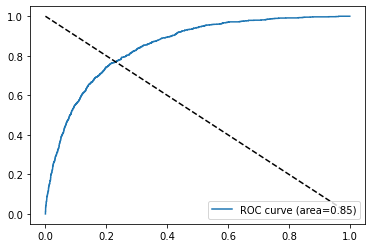

In [86]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding optimal cut-off

In [87]:
numbers = [float (x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.025846,877,0,1,0,0,0,0,0,0,0,0,0
1,1,0.414225,5792,0,1,1,1,1,1,0,0,0,0,0
2,1,0.082333,5334,0,1,0,0,0,0,0,0,0,0,0
3,0,0.036199,878,0,1,0,0,0,0,0,0,0,0,0
4,0,0.118079,6578,0,1,1,0,0,0,0,0,0,0,0


In [88]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)   

     prob  accuracy     sensi     speci
0.0   0.0  0.264300  1.000000  0.000000
0.1   0.1  0.615619  0.943975  0.497656
0.2   0.2  0.718661  0.854950  0.669699
0.3   0.3  0.772008  0.765925  0.774194
0.4   0.4  0.798783  0.667690  0.845878
0.5   0.5  0.809331  0.554873  0.900744
0.6   0.6  0.801420  0.405219  0.943755
0.7   0.7  0.776471  0.214121  0.978495
0.8   0.8  0.747667  0.051420  0.997794
0.9   0.9  0.735700  0.000000  1.000000


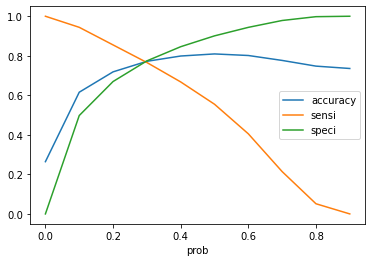

In [89]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Using the optimal cut-off

In [90]:
y_train_pred_final['final_Predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.025846,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.414225,5792,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.082333,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.036199,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.118079,6578,0,1,1,0,0,0,0,0,0,0,0,0


In [91]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_Predicted )
confusion2

array([[2808,  819],
       [ 305,  998]], dtype=int64)

In [92]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_Predicted)

0.7720081135902637

#### Other Metrics

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
#Sensitivity
print(TP / float(TP+FN))
#Specificity
print(TN / float(TN+FP))
#
#print(FP / float(TN+FP))
#
#print(TP / float(TP+FP))
#
#print(TN / float(TN+FN))

0.7659247889485802
0.7741935483870968


### Precision and Recall

In [95]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.5492570170610898

In [96]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7659247889485802

### Precision and Recall using sklearn

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.final_Predicted)

0.5492570170610898

In [99]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.final_Predicted)

0.7659247889485802

### Precision and Recall Tradeoff

In [100]:
from sklearn.metrics import precision_recall_curve

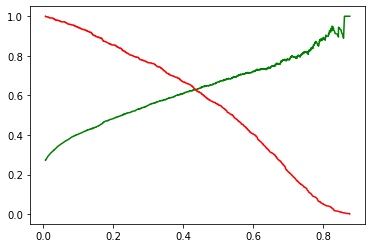

In [101]:
y_train_pred_final.Churn, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on test set

In [102]:
X_test[['tenure','MonthlyCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges']])
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_DSL,MultipleLines_No,OnlineSecurity_No,TechSupport_No
4880,0.713723,0,-1.457203,0,0,0,1,0,0,1,0,0
1541,1.609107,0,-1.480388,0,0,0,1,0,0,1,0,0
1289,1.242814,0,0.140938,0,0,1,0,0,1,0,0,0
5745,1.161415,1,-1.336307,0,1,0,1,0,0,0,0,0
4873,-1.036345,0,-1.498605,0,0,0,0,0,0,1,0,0


In [103]:
y_test_pred = m1.predict(sm.add_constant(X_test)).values.reshape(-1)
y_test_pred[:5]

array([0.01000269, 0.00462097, 0.02397704, 0.01223829, 0.14136054])

In [104]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.010003,4880
1,0,0.004621,1541
2,0,0.023977,1289
3,0,0.012238,5745
4,0,0.141361,4873


In [105]:
y_test_pred_final['Predicted'] = y_test_pred_final['Churn_Prob'].map(lambda x:1 if x>0.3 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
0,0,0.010003,4880,0
1,0,0.004621,1541,0
2,0,0.023977,1289,0
3,0,0.012238,5745,0
4,0,0.141361,4873,0


In [106]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)
confusion3

array([[1137,  410],
       [ 142,  424]], dtype=int64)

In [107]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Predicted)

0.738760056791292

In [108]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [109]:
#Sensitivity
print(TP / float(TP+FN))
#Specificity
print(TN / float(TN+FP))

0.7491166077738516
0.7349709114414997


In [110]:
#Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.5083932853717026

In [111]:
#Recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.7491166077738516

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_Predicted))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      3627
           1       0.55      0.77      0.64      1303

    accuracy                           0.77      4930
   macro avg       0.73      0.77      0.74      4930
weighted avg       0.81      0.77      0.78      4930



In [114]:
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1547
           1       0.51      0.75      0.61       566

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.74      0.75      2113



### Random Forest

In [116]:
X = telecom.drop(['customerID','Churn'], axis=1)
y = telecom['Churn']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 28), (2113, 28), (4930,), (2113,))

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [122]:
%%time
rf.fit(X_train, y_train)

Wall time: 649 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [123]:
rf.oob_score_

0.783975659229209

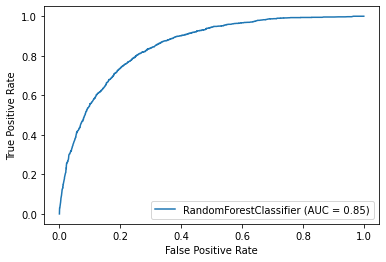

In [125]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyperparameter tuning for Random Forest

In [126]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)
params = {'max_depth':[2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,500], 'n_estimators': [10,25,50,100]}

In [127]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [128]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   33.6s finished
Wall time: 34.2 s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [129]:
grid_search.best_score_

0.8018241262994913

In [130]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=100)

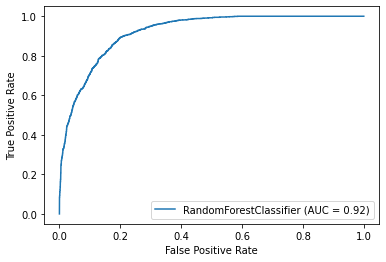

In [131]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [132]:
rf_best.feature_importances_

array([0.15318382, 0.00328848, 0.01790123, 0.10029524, 0.16023428,
       0.01291062, 0.01009734, 0.01128396, 0.02681117, 0.05375058,
       0.0076331 , 0.06195789, 0.00697815, 0.01256703, 0.01942017,
       0.06602846, 0.01122335, 0.01086179, 0.06630727, 0.01293255,
       0.02887002, 0.00916673, 0.08791564, 0.01485643, 0.00896323,
       0.00721742, 0.00969796, 0.00764607])

In [133]:
imp_df = pd.DataFrame({'Varname': X_train.columns, 'Imp':rf_best.feature_importances_})
imp_df.sort_values(by='Imp', ascending=False)

,Varname,Imp
4,TotalCharges,0.160234
0,tenure,0.153184
3,MonthlyCharges,0.100295
22,TechSupport_No,0.087916
18,OnlineSecurity_No,0.066307
15,InternetService_Fiber optic,0.066028
11,PaymentMethod_Electronic check,0.061958
9,Contract_Two year,0.053751
20,DeviceProtection_No,0.028870
8,Contract_One year,0.026811
